### Necessary Packages

In [1]:
import torch
import sys
sys.path.append('..')
import os
import matplotlib.pyplot as plt
from src.models import Transformer
from src.utils import ImageCaptionGenerator,read_json,DatasetDescriptor,Tokenizer,seed_everything
from src.datasets import ImageDirectory
from definitions import MODELS_DIR,TEST_IMAGES_DIR
from torchvision.transforms import Compose,Resize,ToTensor
from PIL import Image

### Global

In [2]:
WEIGHTS_PATH = os.path.join(MODELS_DIR, "transformer", "1715305703.9656034.pt")
CONFIG_PATH = os.path.join(MODELS_DIR, "transformer", "config.json")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
IMG_SIZE = 384

### Reprocucibility

In [4]:
SEED = 6

In [5]:
seed_everything(SEED)

### Load the model

In [6]:
descriptor : DatasetDescriptor = DatasetDescriptor.get_by_name("flickr30k")
tokenizer : Tokenizer = Tokenizer.load(descriptor.vocab_path)

In [7]:
model_config = read_json(CONFIG_PATH)

In [8]:
model = Transformer(
    **model_config,
    vocab_size=len(tokenizer.vocab),
    device=DEVICE,
    pad_idx=tokenizer.vocab.pad_idx
).to(DEVICE)

In [9]:
state_dict = torch.load(WEIGHTS_PATH)
model.load_state_dict(state_dict)

<All keys matched successfully>

### Create caption generator

In [10]:
preporcessor = Compose([
    Resize((IMG_SIZE,IMG_SIZE)),
    ToTensor()
])

In [11]:
image_caption_generator = ImageCaptionGenerator(
    model, 
    tokenizer, 
    model_config["max_len"], 
    device=DEVICE,
    preprocessor=preporcessor
)

### Testing on images from the internet

In [12]:
dataset = ImageDirectory(root=TEST_IMAGES_DIR)

In [13]:
len(dataset)

20

In [14]:
def caption_image(img : Image.Image):
    
    caption = image_caption_generator.get_caption(img)

    plt.imshow(img)
    plt.title(caption)

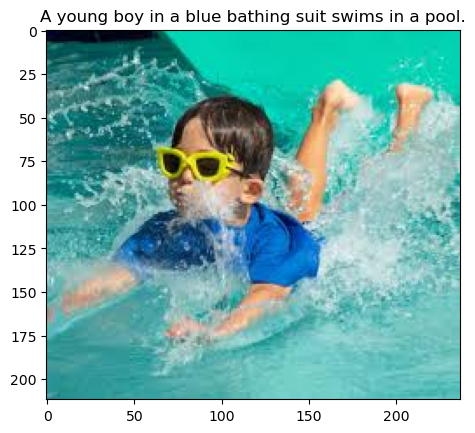

In [15]:
caption_image(dataset[0])

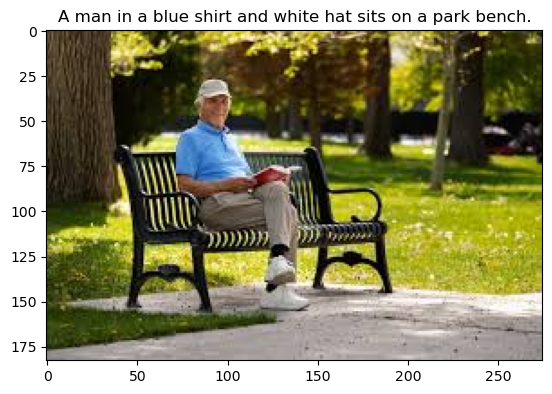

In [16]:
caption_image(dataset[1])

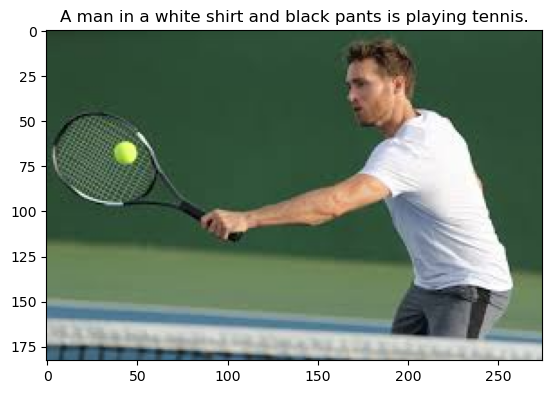

In [17]:
caption_image(dataset[2])

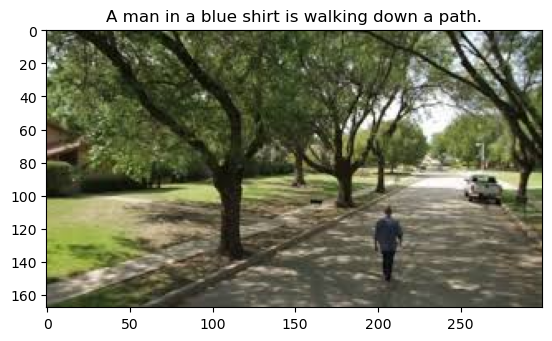

In [18]:
caption_image(dataset[3])

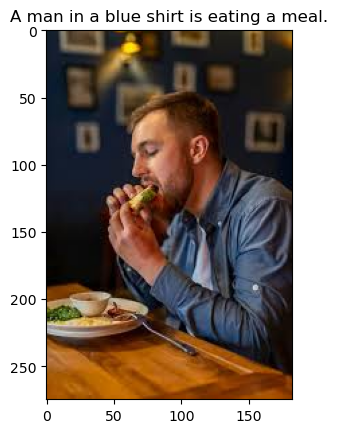

In [19]:
caption_image(dataset[4])

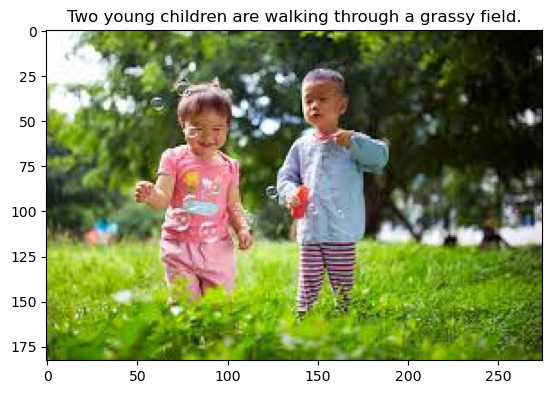

In [20]:
caption_image(dataset[5])

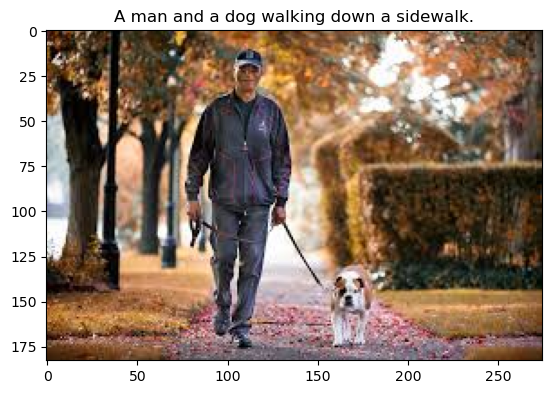

In [21]:
caption_image(dataset[6])

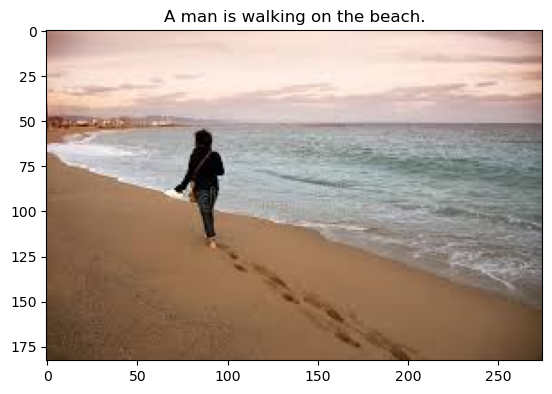

In [22]:
caption_image(dataset[7])

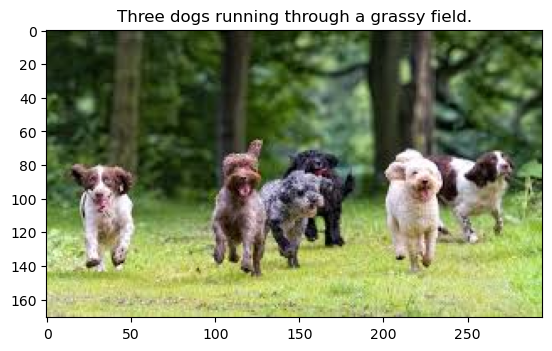

In [23]:
caption_image(dataset[8])

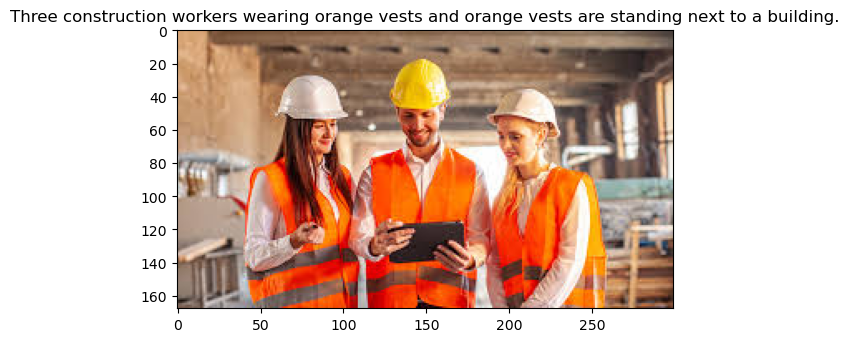

In [24]:
caption_image(dataset[9])

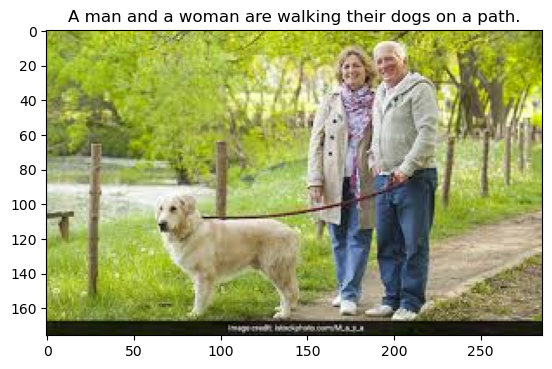

In [25]:
caption_image(dataset[10])

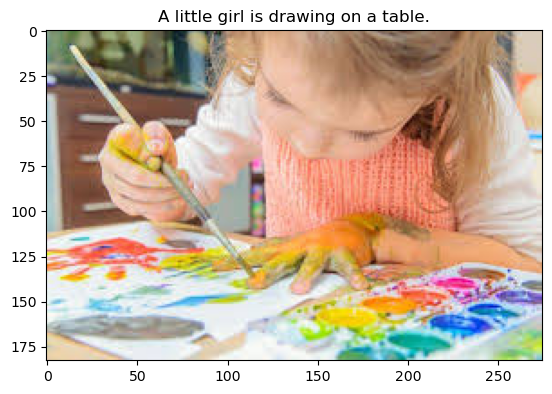

In [26]:
caption_image(dataset[11])

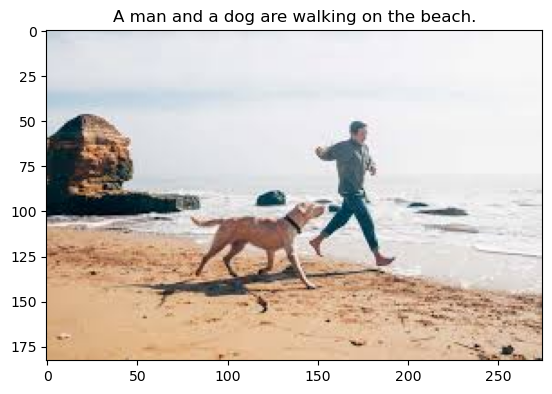

In [27]:
caption_image(dataset[12])

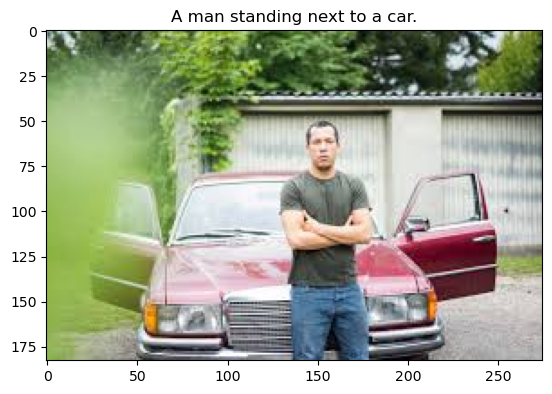

In [28]:
caption_image(dataset[13])

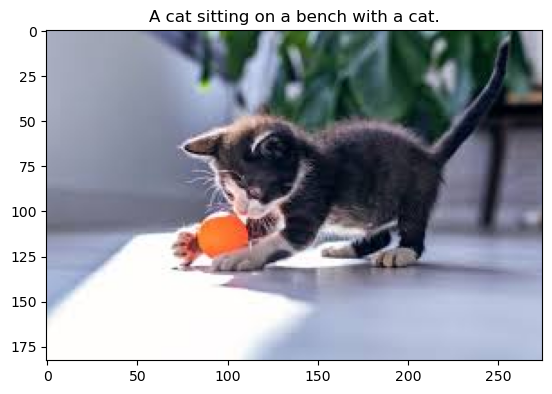

In [29]:
caption_image(dataset[14])

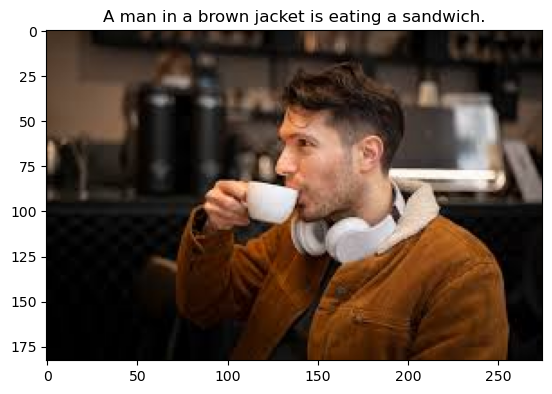

In [30]:
caption_image(dataset[15])

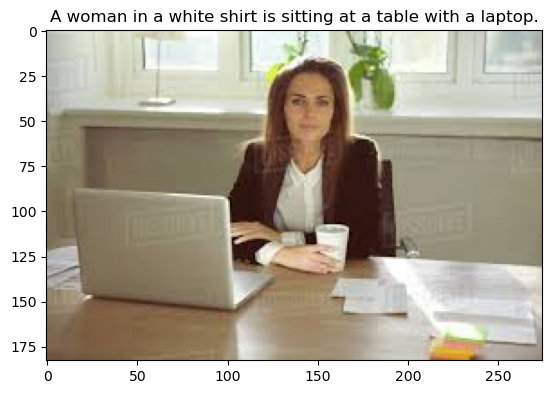

In [31]:
caption_image(dataset[16])

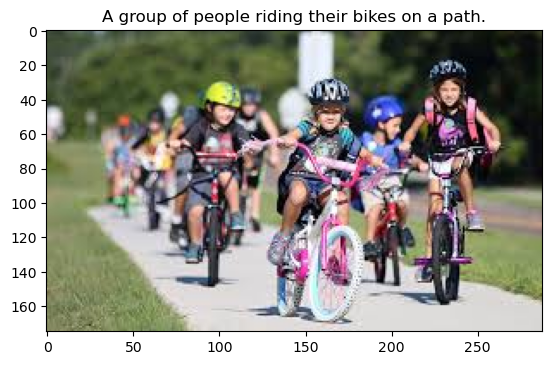

In [32]:
caption_image(dataset[17])

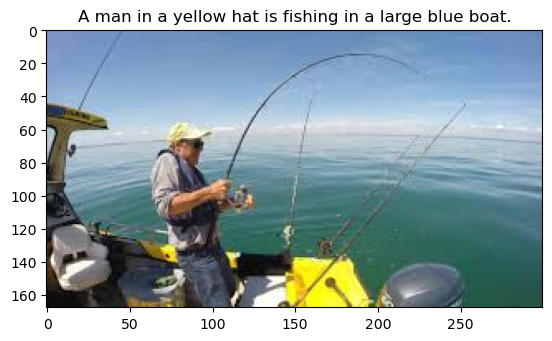

In [33]:
caption_image(dataset[18])

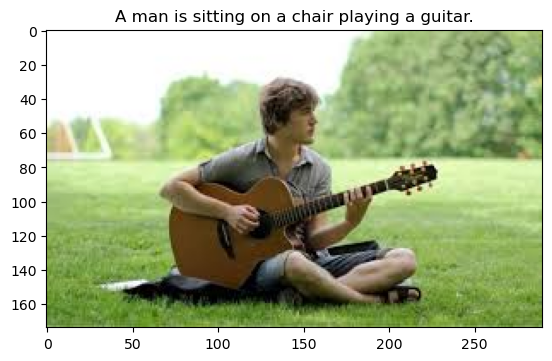

In [34]:
caption_image(dataset[19])